# PCA

Author: Dorota Lączak, ISZ

## EX. 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### usarrests.csv  Data Example

In [5]:
df = pd.read_csv('usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [8]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [10]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [12]:
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [14]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


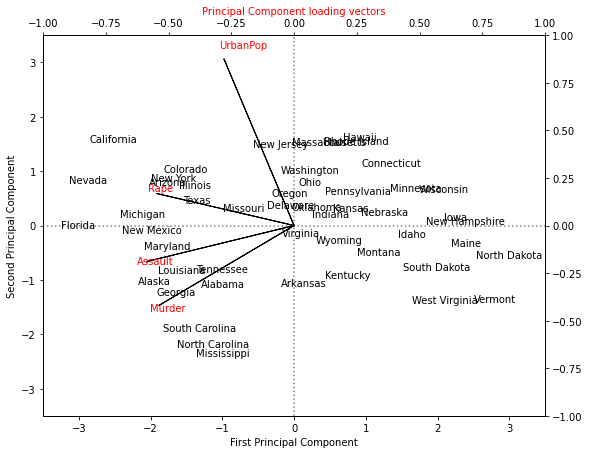

In [17]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
  ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
  ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [18]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x7f3d2e2e2f98>,
 <a list of 4 Text major ticklabel objects>)

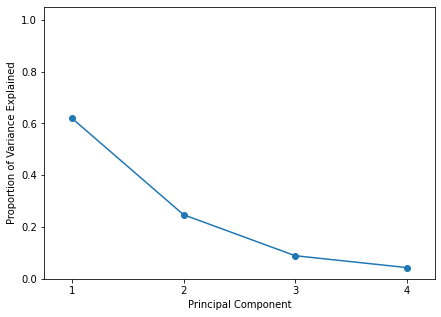

In [20]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x7f3d1034e0f0>,
 <a list of 4 Text major ticklabel objects>)

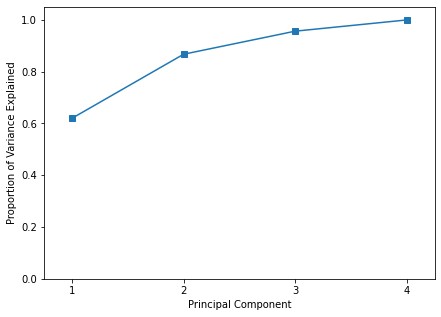

In [21]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

###  NCI60 Data Example

In [26]:
df2 = pd.read_csv('nci60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [27]:
# Read in the labels to check our work later
y = pd.read_csv('nci60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [28]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))


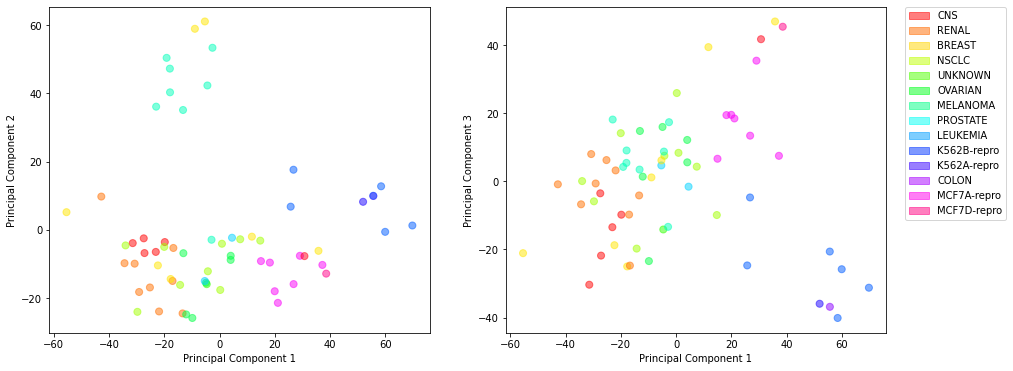

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
  handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig.axes:
  ax.set_xlabel('Principal Component 1')

In [39]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).values,
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
              index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
              columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

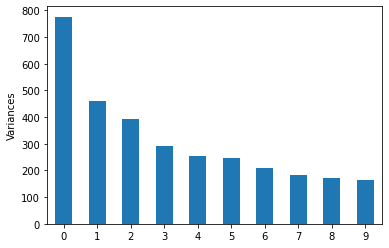

In [40]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

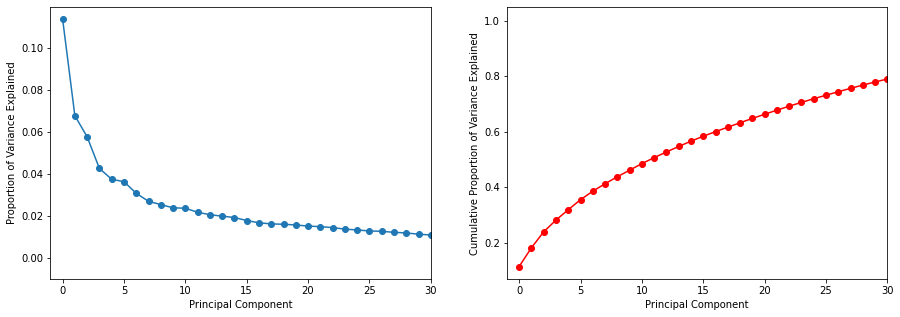

In [43]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
  ax.set_xlabel('Principal Component')
  ax.set_xlim(-1,30)

## EX. 2

In [44]:
from sklearn.datasets import  load_wine

In [47]:
data_wine = load_wine()
print(data_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [48]:
df = pd.DataFrame(data_wine.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 2.1 Data standarization

In [51]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


No inf's found in dataset (max values)

In [50]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

No NaN's, empty cells found in dataset

In [52]:
### keep only numeric features
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

All features are numeric

In [53]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [55]:
y = pd.DataFrame(data_wine.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


### 2.1a train test split

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=42)

### 2.2 Covariance Matrixes

In [57]:
cov_matrix = np.cov(X_train)


In [61]:
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
0,0.551221,0.017281,-0.215189,-0.309836,0.512375,0.019690,0.286732,0.307517,-0.298057,-0.536611,0.023909,0.266092,0.181777,0.170413,0.287668,-0.551574,0.180214,0.202645,-0.348649,0.242771,0.390435,0.197530,-0.217183,0.062790,0.158317,0.340957,-0.365430,-0.137997,0.481462,-0.443705,-0.023235,0.365080,-0.562814,0.093212,-0.240978,0.298238,0.047445,0.169522,0.311049,-0.202967,...,-0.255652,0.126176,-0.195888,-0.477936,-0.235599,-0.331808,-0.329653,0.288456,0.241561,-0.148366,0.715798,-0.404218,0.522350,0.297493,-0.077014,0.218576,0.339863,-0.306281,-0.148873,0.205172,-0.493492,-0.259405,0.291164,0.400714,-0.383006,-0.122388,-0.226790,-0.064599,0.232211,0.032848,-0.136940,0.328013,0.090209,-0.506085,0.271897,0.129605,0.044143,0.728972,-0.194060,-0.033299
1,0.017281,0.790757,-0.175682,-0.339985,0.161634,0.547142,0.136069,-0.049176,-0.538564,-0.278956,0.435090,0.412837,-0.134279,0.404985,0.310054,-0.500013,0.544538,0.813301,-0.361379,0.179079,0.075501,0.266171,-0.160536,-0.193026,0.210967,0.419735,-0.306605,0.486158,0.372653,-0.564836,0.128771,0.191751,-0.521984,-0.041468,0.184512,0.307573,-0.132204,0.005152,0.174823,-0.288794,...,-0.315241,-0.043750,0.030424,-0.514575,-0.301822,-0.552005,-0.335724,0.479486,0.183252,-0.101724,0.490684,-0.427195,0.029841,0.054570,0.023665,0.051852,-0.000039,-0.653842,-0.070522,0.051953,-0.625330,-0.628044,0.411387,0.179068,-0.487813,-0.206781,-0.591954,0.361468,0.531305,0.386898,0.185976,0.326823,-0.280210,-0.859018,0.310672,0.103658,0.259299,0.264467,-0.107198,-0.008178
2,-0.215189,-0.175682,1.114522,-0.145172,-0.487935,-0.419466,-0.590849,-0.348563,-0.164258,0.170778,0.093900,-0.395474,-0.216853,0.336306,-0.307015,0.473560,-0.140359,-0.319218,-0.068284,-0.601346,-0.609941,-0.463220,0.011470,0.241015,-0.306132,-0.167333,0.299703,-0.048062,-0.672014,0.433527,0.738856,-0.543187,0.556542,0.272964,0.227883,-0.353306,0.472007,-0.100170,-0.427182,0.910795,...,0.211652,-0.399120,0.244657,0.374718,-0.125826,0.097585,0.180421,-0.144943,-0.536037,0.358388,-0.882410,-0.064816,-0.680212,-0.424325,0.444280,0.254605,-0.429600,-0.180628,0.722445,-0.249454,0.480347,0.153735,-0.642279,-0.780710,0.148015,-0.108386,0.038985,0.188027,0.249358,0.288812,0.659982,-0.033157,0.835326,0.364035,-0.490731,0.285103,0.160700,-1.113156,0.251182,0.477648
3,-0.309836,-0.339985,-0.145172,0.942996,-0.494676,-0.199940,-0.237601,-0.323225,1.031661,0.577438,-0.271488,0.154743,-0.286815,-0.575733,-0.535550,0.458053,-0.440324,-0.158213,0.662736,-0.278994,-0.339116,-0.240809,0.505358,-0.174322,-0.200735,0.023636,0.473419,-0.042807,-0.453550,0.589630,-0.377277,-0.317438,0.368438,-0.075723,-0.116401,-0.250177,-0.086418,-0.409003,-0.188895,0.220365,...,0.258274,-0.048046,-0.119145,0.850498,0.643829,0.693213,0.450395,-0.601809,-0.225514,0.233830,-0.400241,0.886164,-0.344436,-0.144088,0.010243,-0.443118,-0.311677,0.724029,-0.065225,-0.267269,0.900072,0.650008,-0.469812,-0.364450,0.707950,0.246598,0.710572,-0.094531,-0.475222,-0.219915,-0.229952,-0.502818,-0.177628,0.810407,-0.379241,-0.660146,-0.133501,-0.387679,0.342066,-0.231370
4,0.512375,0.161634,-0.487935,-0.494676,0.799276,0.267063,0.404259,0.443235,-0.569955,-0.559868,0.129044,0.136262,0.309636,0.151465,0.544241,-0.594171,0.265061,0.241755,-0.387460,0.604416,0.679206,0.421938,-0.352728,-0.010401,0.318754,0.103940,-0.483989,-0.070199,0.739201,-0.643443,-0.286124,0.528642,-0.532027,-0.121363,-0.121894,0.288045,-0.078459,0.348717,0.291060,-0.502974,...,-0.284607,0.232514,-0.022641,-0.790745,-0.355914,-0.497826,-0.417419,0.333958,0.403351,-0.206848,0.830977,-0.600968,0.609317,0.398889,-0.172614,0.208990,0.461486,-0.295305,-0.369866,0.365057,-0.766604,-0.328957,0.543545,0.507048,-0.580224,-0.120692,-0.426899,-0.171753,0.109312,0.

### 2.3

In [62]:
w, v = np.linalg.eig(cov_matrix)

In [63]:
explained_variances = [w_i/np.sum(w) for w_i in w]

In [65]:
explained_variances[:5]

[(0.38211344347858733+1.8153621052781995e-33j),
 (0.18559045244883804+8.8171164932054e-34j),
 (0.09455886325705266+4.492345925135079e-34j),
 (0.08246383059797945+3.917729555935963e-34j),
 (0.07295532290938646+3.4659950035350244e-34j)]

### 2.4 Sort

In [66]:
sorted_w_v = sorted(zip(w, v), reverse=True)

In [78]:
w_sorted, v_sorted = [ list(storted_touple) for storted_touple in  zip(*sorted_w_v)]

### 2.5

In [79]:
sorted_explained_variances = [w_i/np.sum(w_sorted) for w_i in w_sorted]

In [82]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


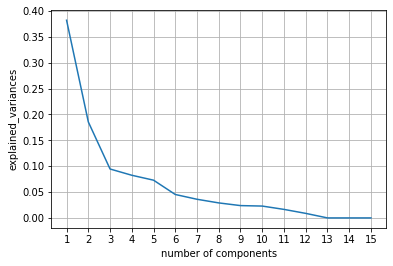

In [103]:
plt.plot(sorted_explained_variances[:15])
plt.grid()
plt.ylabel("explained_variances")
plt.xlabel('number of components')

plt.xticks(range(15), range(1, 16))
plt.show()

Check with PCA module

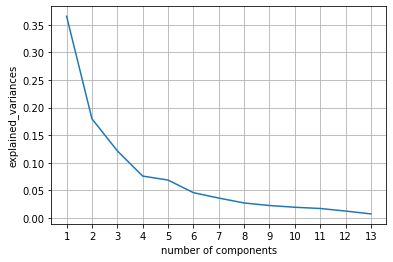

In [100]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.grid()
plt.ylabel("explained_variances")
plt.xticks(range(13), range(1, 14))
plt.show()

### 2.6 

Based on plot above k was set to 4. There is no significant diffrence between explained variances for 4 and 5 


In [104]:
k=4

In [112]:
v_sorted[:k]

[array([ 0.07090541+0.j        , -0.02045464+0.j        ,
         0.00479487+0.j        , -0.06996347+0.j        ,
         0.04634359+0.j        ,  0.10534902+0.j        ,
        -0.05243251+0.j        ,  0.19412384+0.j        ,
        -0.06240346+0.j        ,  0.05710851+0.j        ,
         0.01188967+0.j        ,  0.00198655+0.j        ,
         0.09921468+0.j        ,  0.00496073-0.05978643j,
         0.00496073+0.05978643j, -0.06770671+0.03391356j,
        -0.06770671-0.03391356j,  0.10370667+0.j        ,
        -0.00656105-0.05083117j, -0.00656105+0.05083117j,
         0.02411434+0.00657628j,  0.02411434-0.00657628j,
         0.02436231+0.00227584j,  0.02436231-0.00227584j,
         0.07933946-0.05950739j,  0.07933946+0.05950739j,
         0.12986301+0.j        , -0.0304229 +0.06539493j,
        -0.0304229 -0.06539493j,  0.06348451-0.0132709j ,
         0.06348451+0.0132709j ,  0.0768047 +0.j        ,
        -0.0566415 +0.0041881j , -0.0566415 -0.0041881j ,
        -0.039